<a href="https://colab.research.google.com/github/NithickRoshan/githupbemc2/blob/main/Copy_of_OCR_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y tesseract-ocr
!pip install -q pytesseract opencv-python Pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import cv2
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

In [ ]:
image_path = "/content/data.jpg"

# Load in grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Preprocessing: denoise + threshold (good for old docs)
img = cv2.GaussianBlur(img, (3,3), 0)
_, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Optional: Morphological opening (remove small noise)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)


In [ ]:
custom_config = r'--oem 3 --psm 6'
# oem 3 = LSTM OCR Engine, psm 6 = assume uniform block of text
text = pytesseract.image_to_string(img, config=custom_config)

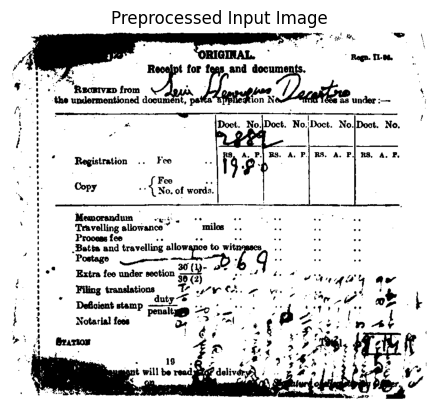

📜 OCR Extracted Text:
----------------------------------
RP as Me ~~ |
a : RIGINAL. ~ a
oa Reoejpt for foes and documents. :
poo Ae
¥ cae: Reoptvep from w Eoowten 4, ‘
-.«  -the undermentioned documént, ps ‘ion Ni a8 under :—~ %
a a
od « - _ {Doet, No |Doct. Ne Dost. No|Doct. No. '
ii a
_ : * Registration .. Feo . i e Bs. a. P|) Rs. A. P| RS, 4. PF
4 : Co Fee “
KO Py ** No, of words.
» .
. : Memorandun ges, . sae se ae
‘ot ‘Travelling allowance” milos .. . .
: Process fee ling allowance to wit . o +
: .Batta and travelling allow: wi . a ee
v4 Postage ab q i 7 2
tee . y- ot © .
so Extra feo undor section 353) eft a wg DY ae
so Filing translations TWF ‘gd ‘&
Lode ° duty“ * ee og k
A ‘ Deficient stamp aig 20 Le . ‘p coped ee aan
} 3 Notarial feos lal Z.,.! alt
: i f FP rg3 nr ‘
%) 4 > Lf gtr
Besos fn 42 3708 TGR
‘ ii , . 19 .@ + ea bake RS OL,
s _— R ‘ Stay ¢ BD? |.
7 Peumont will be readgtar delivery i . 2 a 4 fj Pe 4?
co a a a Sa er,
. RES eee ea _ he tte 3 SO ae
-----------------------

In [ ]:
# STEP 5: Show Results
# ==========================
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Preprocessed Input Image")
plt.show()

print("📜 OCR Extracted Text:")
print("----------------------------------")
print(text.strip())
print("----------------------------------")